In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [6]:
dengue['Month']

0         January
1        February
2           March
3           April
4             May
          ...    
1015       August
1016    September
1017      October
1018     November
1019     December
Name: Month, Length: 1020, dtype: object

In [7]:
dengue['Year']

0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
1015    2020
1016    2020
1017    2020
1018    2020
1019    2020
Name: Year, Length: 1020, dtype: int64

In [8]:
dengue['Region']

0       Region I
1       Region I
2       Region I
3       Region I
4       Region I
          ...   
1015       BARMM
1016       BARMM
1017       BARMM
1018       BARMM
1019       BARMM
Name: Region, Length: 1020, dtype: object

In [9]:
dengue['Dengue_Cases']

0       705
1       374
2       276
3       240
4       243
       ... 
1015     91
1016     16
1017     13
1018     15
1019     23
Name: Dengue_Cases, Length: 1020, dtype: int64

In [10]:
dengue['Dengue_Deaths']

0       1
1       0
2       0
3       2
4       1
       ..
1015    0
1016    8
1017    9
1018    1
1019    0
Name: Dengue_Deaths, Length: 1020, dtype: int64

In [11]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [12]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
dengue['Date'] = pd.to_datetime(dengue['Year'].astype(str) + '-' + dengue['Month'].astype(str), errors='coerce')
dengue = dengue.sort_values('Date')

C:\Users\LAB4-StudentPC33\AppData\Local\Temp\ipykernel_17428\2742795172.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dengue['Date'] = pd.to_datetime(dengue['Year'].astype(str) + '-' + dengue['Month'].astype(str), errors='coerce')


<h1>Converting Data Types</h1>

In [13]:
dengue['Month'] = dengue['Month'].astype('category')
dengue['Region'] = dengue['Region'].astype('category')
dengue['Year'] = dengue['Year'].astype('int64')

In [14]:
dengue.dtypes

Month                  category
Year                      int64
Region                 category
Dengue_Cases              int64
Dengue_Deaths             int64
Date             datetime64[ns]
dtype: object

<h1>1. Dengue Cases Each Year:</h1>

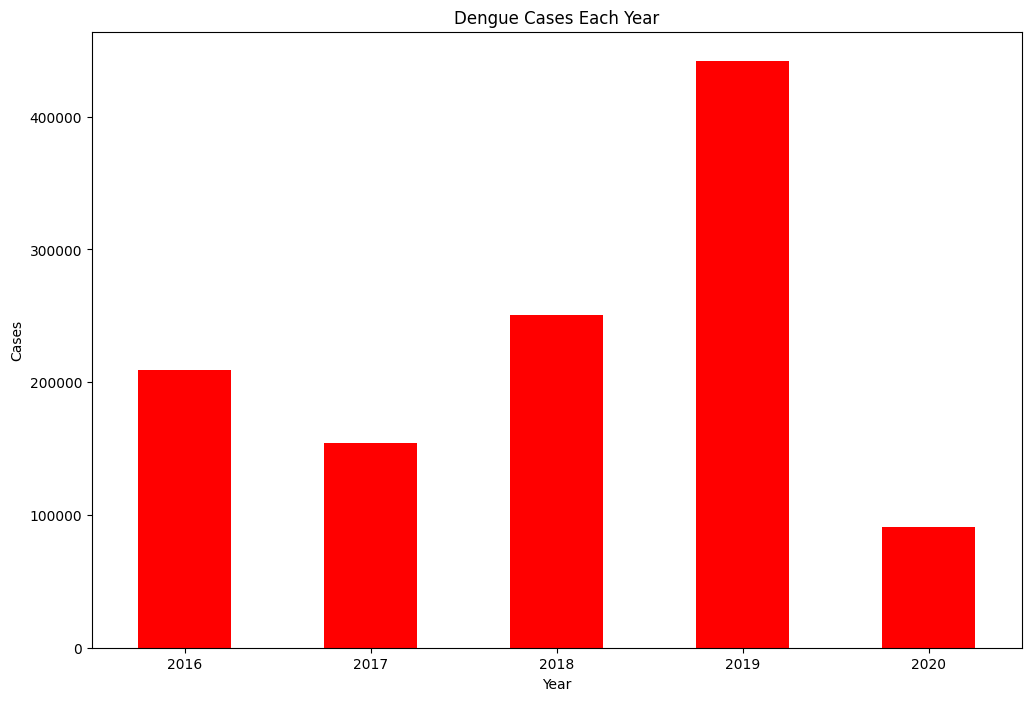

In [15]:
dengue_cases = dengue.groupby("Year")["Dengue_Cases"].sum()
dengue_cases.plot(kind="bar", figsize=(12,8), color='red')
plt.title("Dengue Cases Each Year")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.xticks(rotation=0)
plt.show()

<h1>INSIGHT: 2019 recorded the Most cases while 2020 has the Least</h1>

<h1>2. Dengue Cases Each Region using Bar Plot</h1>

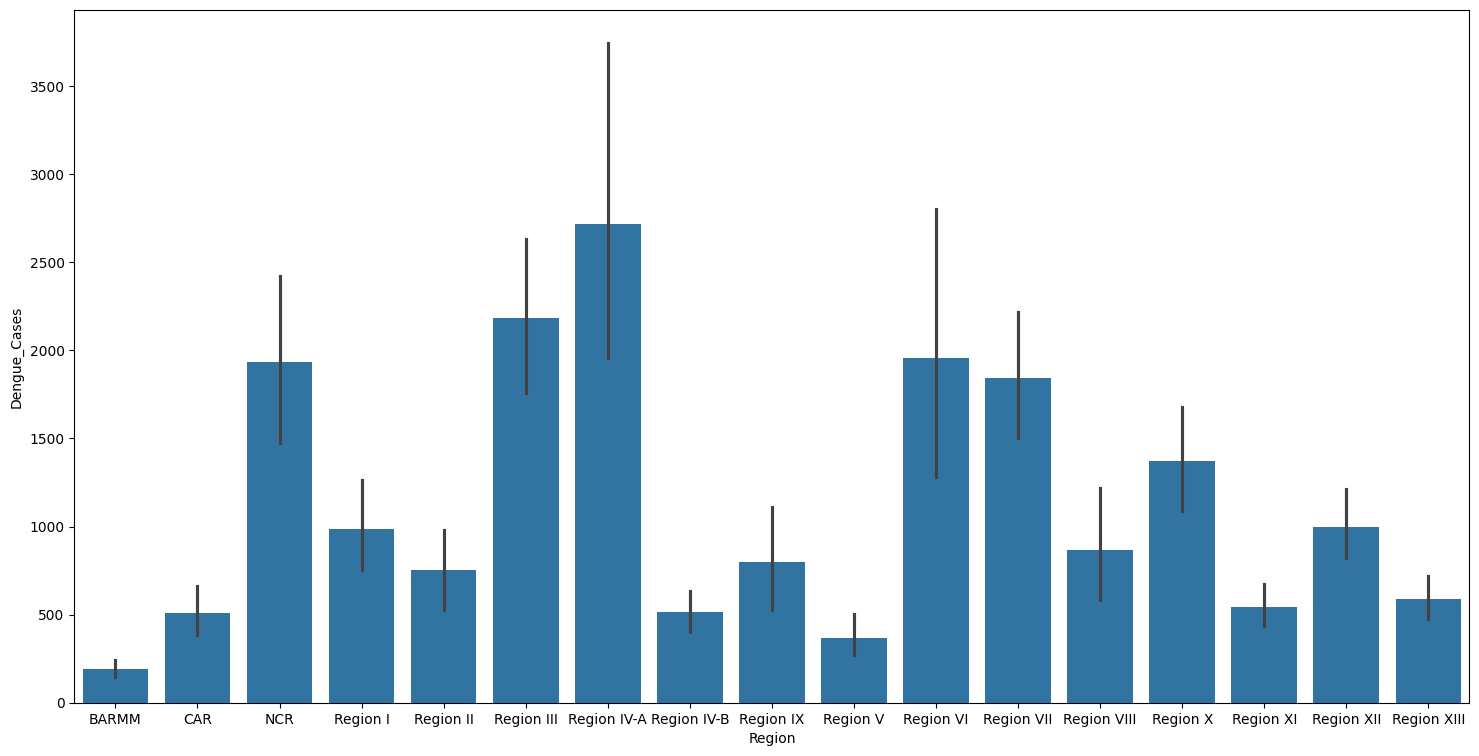

In [16]:
sns.barplot(data = dengue,x ="Region" , y = "Dengue_Cases")
plt.gcf().set_size_inches(18,9)
plt.show()

<h1>INSIGHT: Region IV-A has the Most dengue cases recorded while BARMM has the Least</h1>

<h1>3. Recorded Dengue Deaths Each Month using Line Plot</h1>

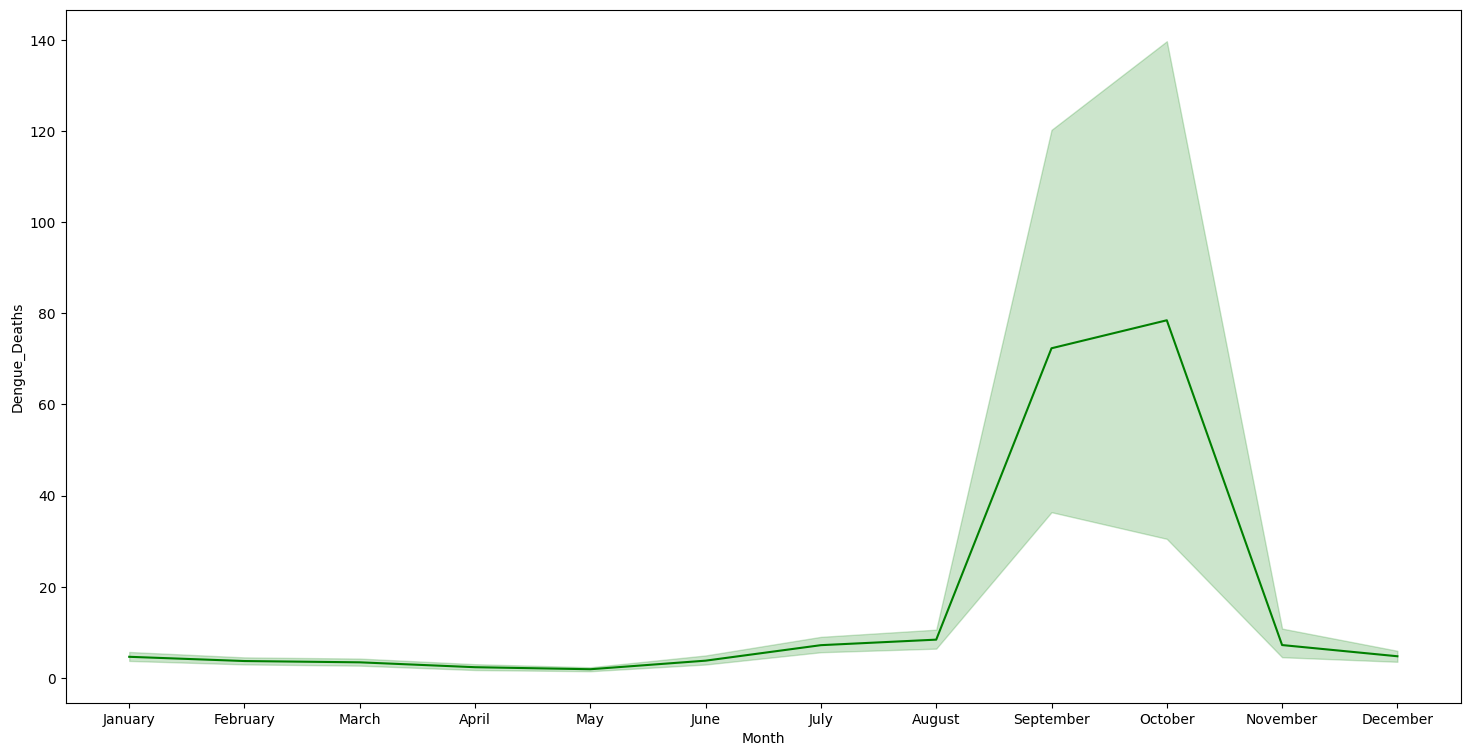

In [17]:
sns.lineplot(data = dengue,x ="Month" , y = "Dengue_Deaths", color = "green")
plt.gcf().set_size_inches(18,9)
plt.show()


<h1>INSIGHT: It shows that during Ber Months recorded the Most due to its season which is raining, October recorded the Most Deaths</h1>

<h1>4. Representation/Correlation between Dengue Deaths and Dengue Cases

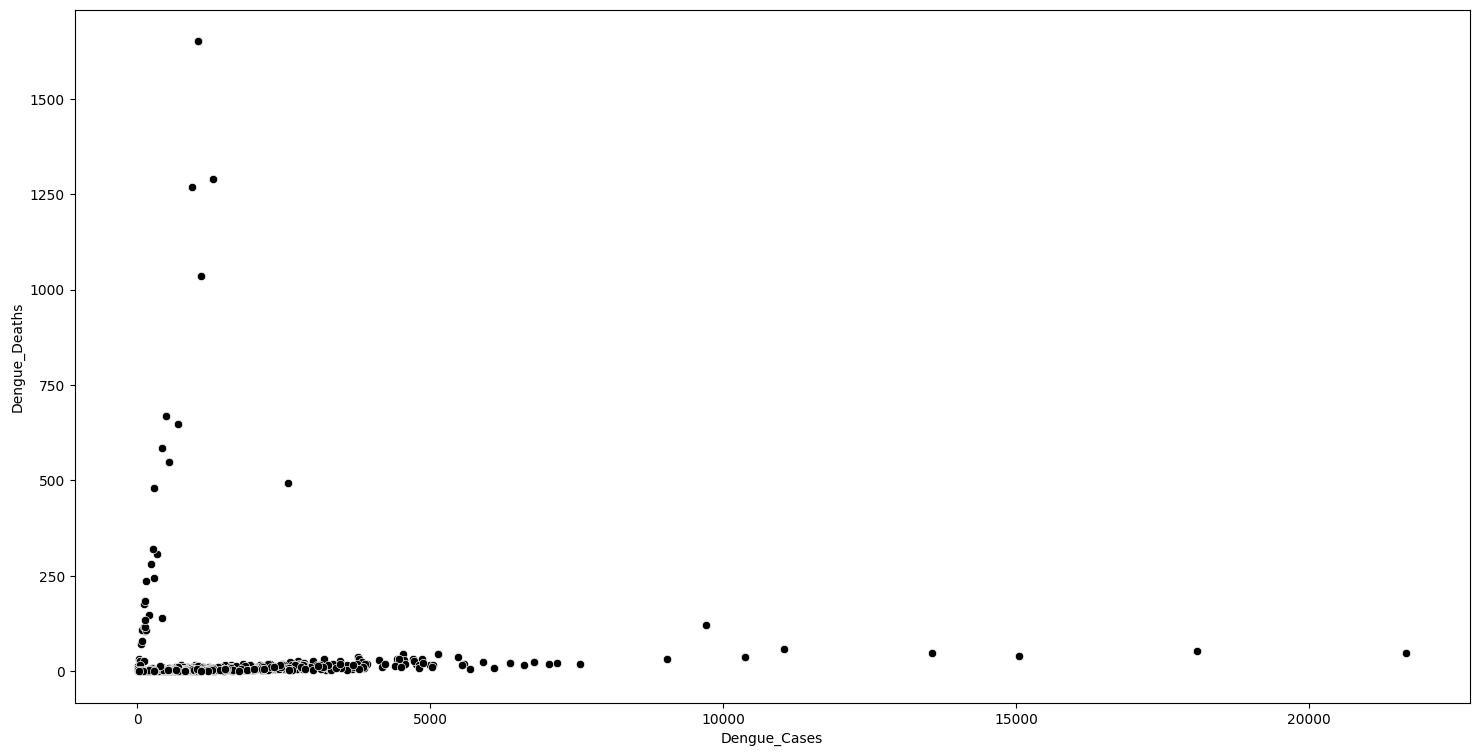

               Dengue_Deaths  Dengue_Cases
Dengue_Deaths       1.000000      0.038322
Dengue_Cases        0.038322      1.000000


In [18]:
sns.scatterplot(data=dengue, y="Dengue_Deaths", x="Dengue_Cases", color = "black")
plt.gcf().set_size_inches(18, 9)
plt.show()

print(dengue[[ "Dengue_Deaths","Dengue_Cases"]].corr())

<h1>INSIGHT:  This suggests that while most cases do not result in many deaths, certain situations lead to a high fatality rate. Theres a positive correlation between Dengue Cases and Dengue Deaths but this is not a linear </h1>

<h1>5. Trend and Representation of Dengue Cases each Region over the year</h1>

C:\Users\LAB4-StudentPC33\AppData\Local\Temp\ipykernel_17428\2946803617.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  dengue.pivot_table(index="Year", columns="Region", values="Dengue_Cases", aggfunc="sum").plot(figsize=(18,9))


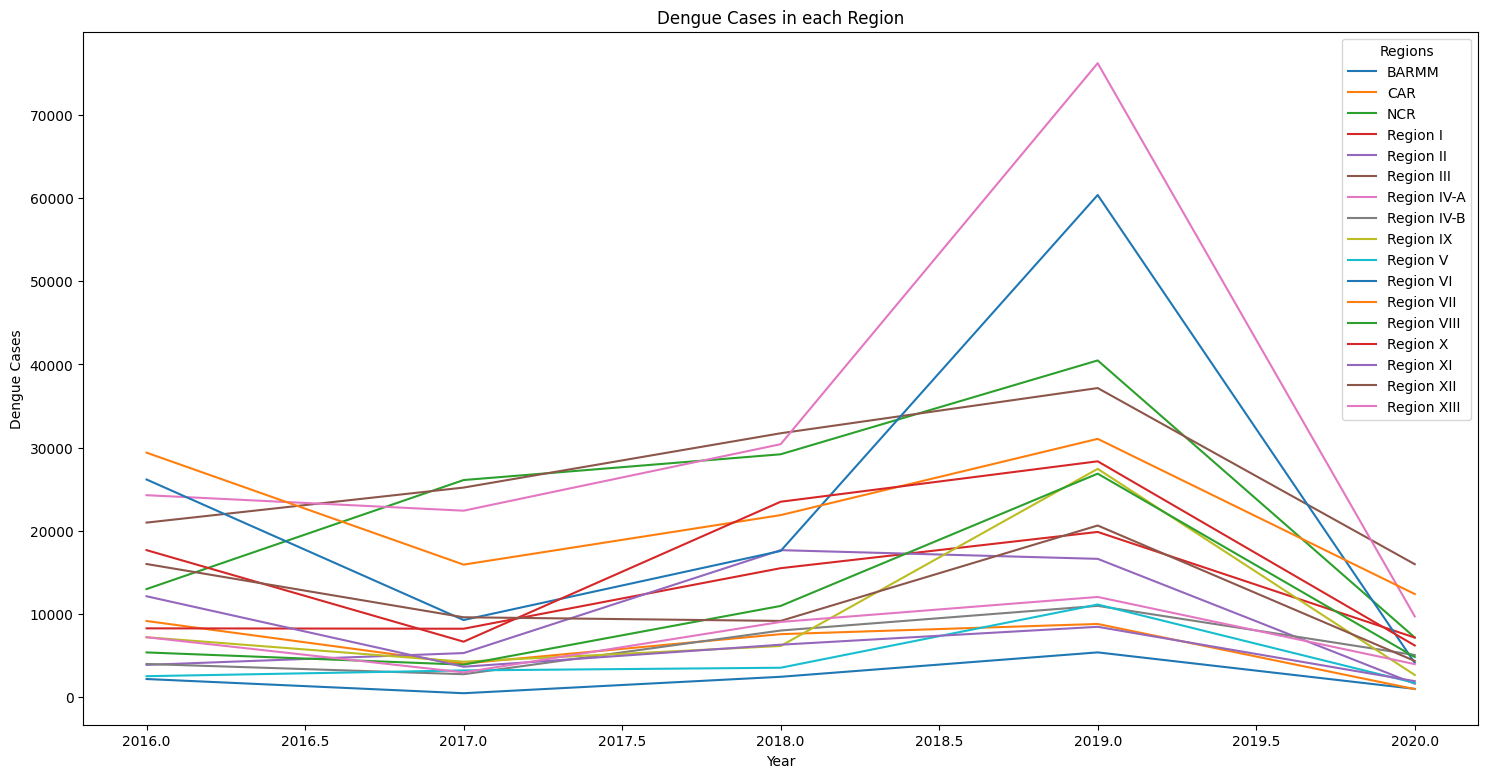

In [19]:
dengue.pivot_table(index="Year", columns="Region", values="Dengue_Cases", aggfunc="sum").plot(figsize=(18,9))
plt.title("Dengue Cases in each Region")
plt.ylabel("Dengue Cases")
plt.legend(title="Regions")
plt.show()

<h1>INSIGHT: 2019 has the Most Dengue Cases recorded accross all Regions while Region IV-A recorded the Highest Dengue Cases</h1>

<h1>6. Trends and Representation of Dengue Cases each Month using Line Plot</h1>

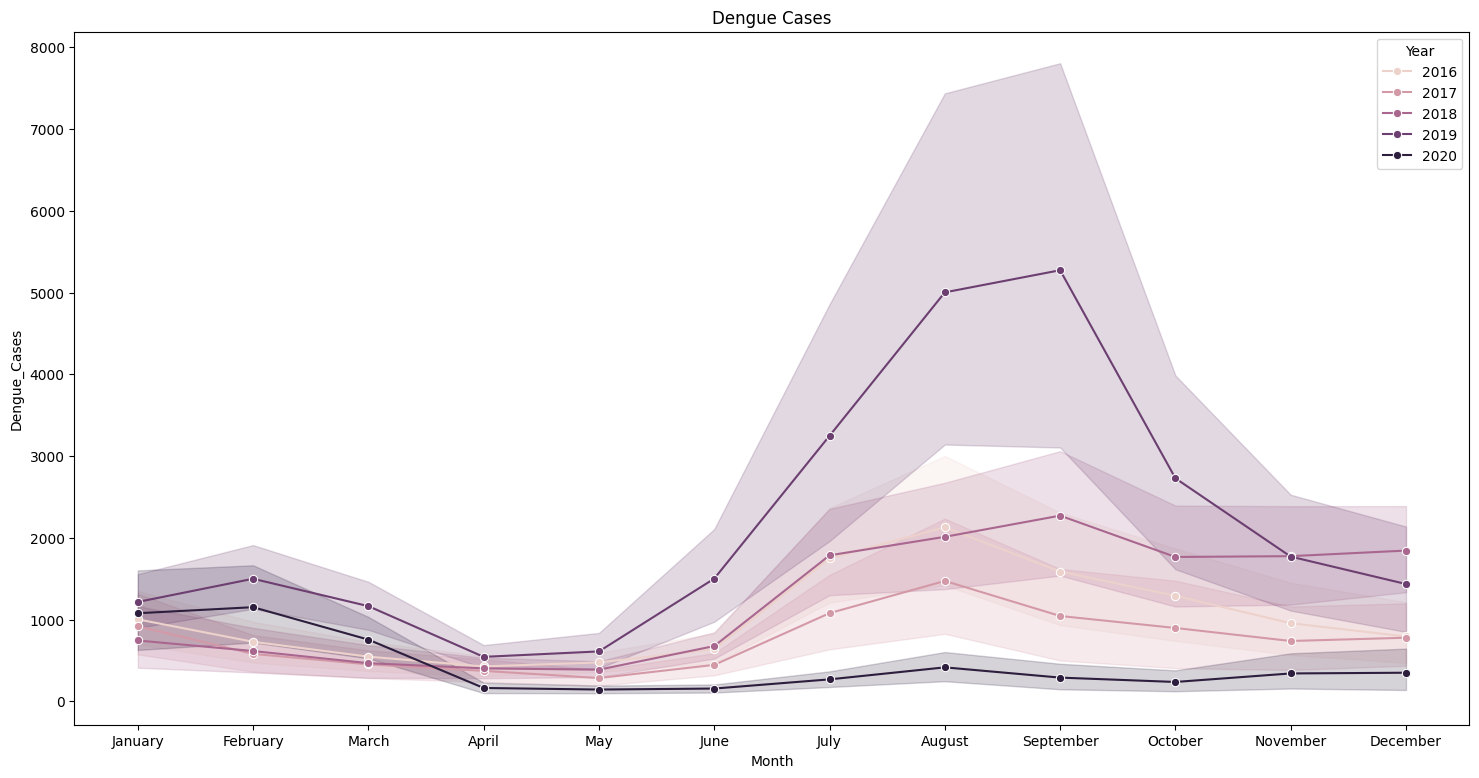

In [20]:
month = ["January","February", "March","April","May","June","July","August","September","October","November","December"]
dengue['Month'] = pd.Categorical(dengue['Month'],categories =month,ordered= True)

sns.lineplot(data = dengue, x = 'Month', y = 'Dengue_Cases', hue = 'Year', marker = 'o')
plt.title("Dengue Cases")
plt.gcf().set_size_inches(18, 9)
plt.show()

<h1>INSIGHT: We already know 2019 has the Highest Dengue Cases from previous visualization but this represents that the Cases starts to increases each month from June to September and starts decreasing during October </h1>

<h1>7. Dengue Cases by Region during the Year of 2019</h1>

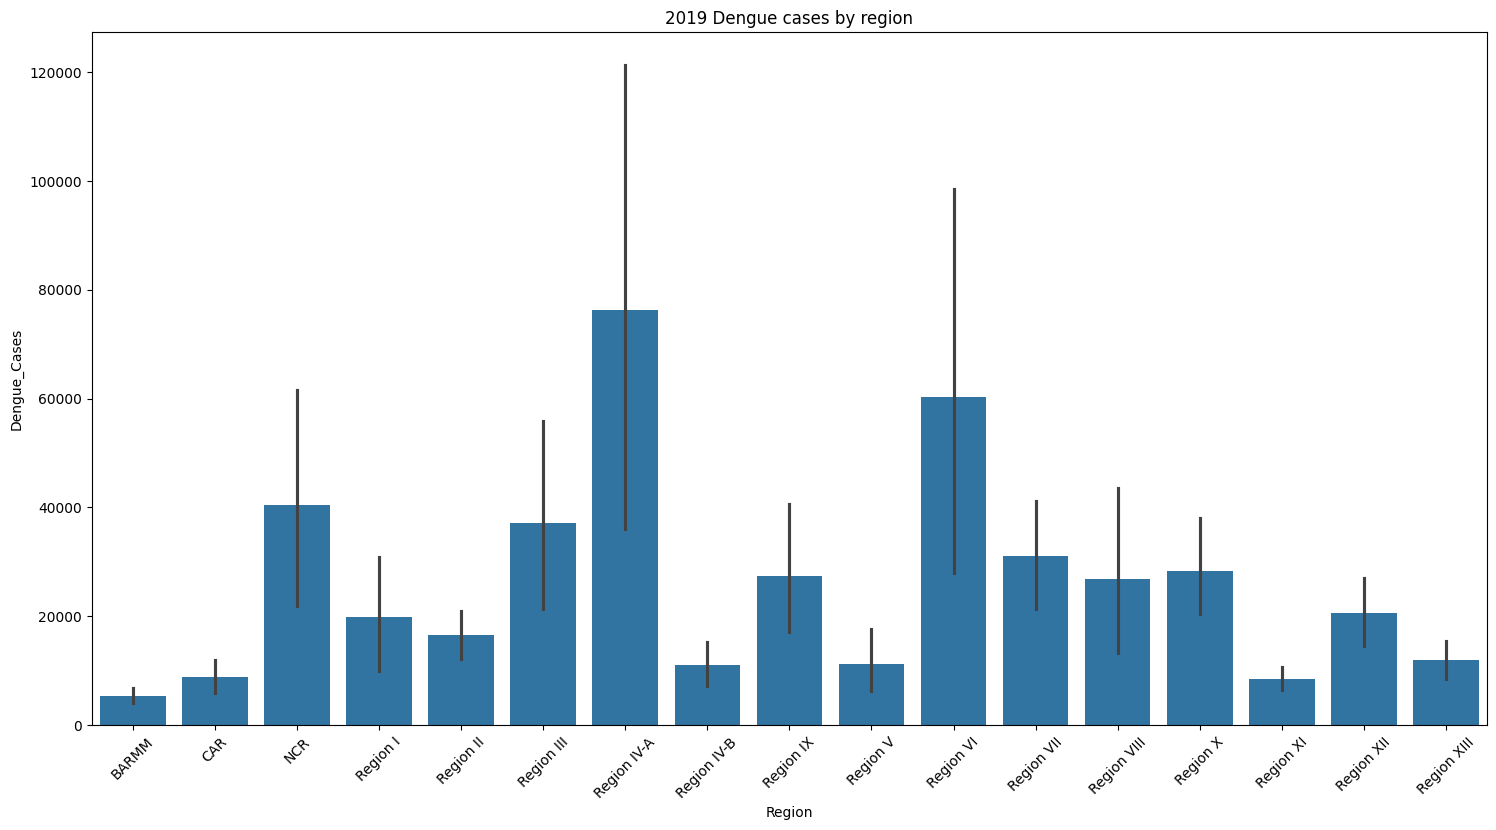

In [24]:
sns.barplot(data=dengue[dengue['Year'] == 2019], x='Region', y='Dengue_Cases', estimator=sum)
plt.title("2019 Dengue cases by region")
plt.gcf().set_size_inches(18, 9)
plt.xticks(rotation=45)
plt.show()

<h1>INSIGHT: in 2019, stil Region IV-A has the Most Dengue Cases while Region BARMM has the Least</h1>

<h1>8. Trend of Dengue Cases in Region IV-A each Year</h1>

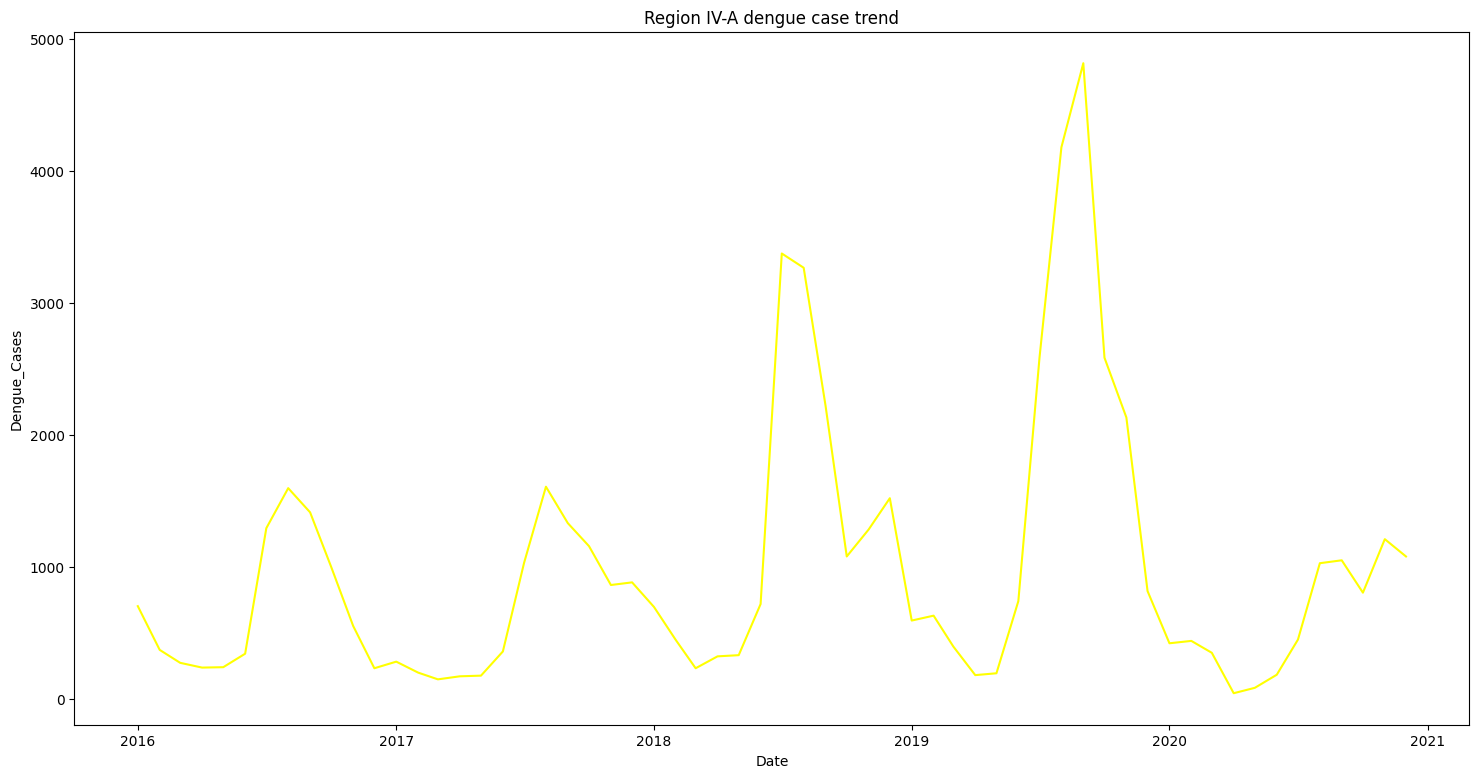

In [28]:
sns.lineplot(data=dengue[dengue['Region'] == 'Region I'], x='Date', y='Dengue_Cases', color = 'yellow')
plt.title("Region IV-A dengue case trend")
plt.gcf().set_size_inches(18, 9)
plt.show()

<h1>INSIGHT: among all Region we know IV-A has the Most recorded Dengue Cases from this visualization, during 2020 Region IV-A recorded its highest Yearly Dengue Cases</h1>

<h1>9. How Dengue Cases Changes the Monthly Cases by Region</h1>

C:\Users\LAB4-StudentPC33\AppData\Local\Temp\ipykernel_17428\167340104.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dengue.groupby(['Region', 'Month'])['Dengue_Cases'].sum().unstack().T.plot(figsize=(12,6))


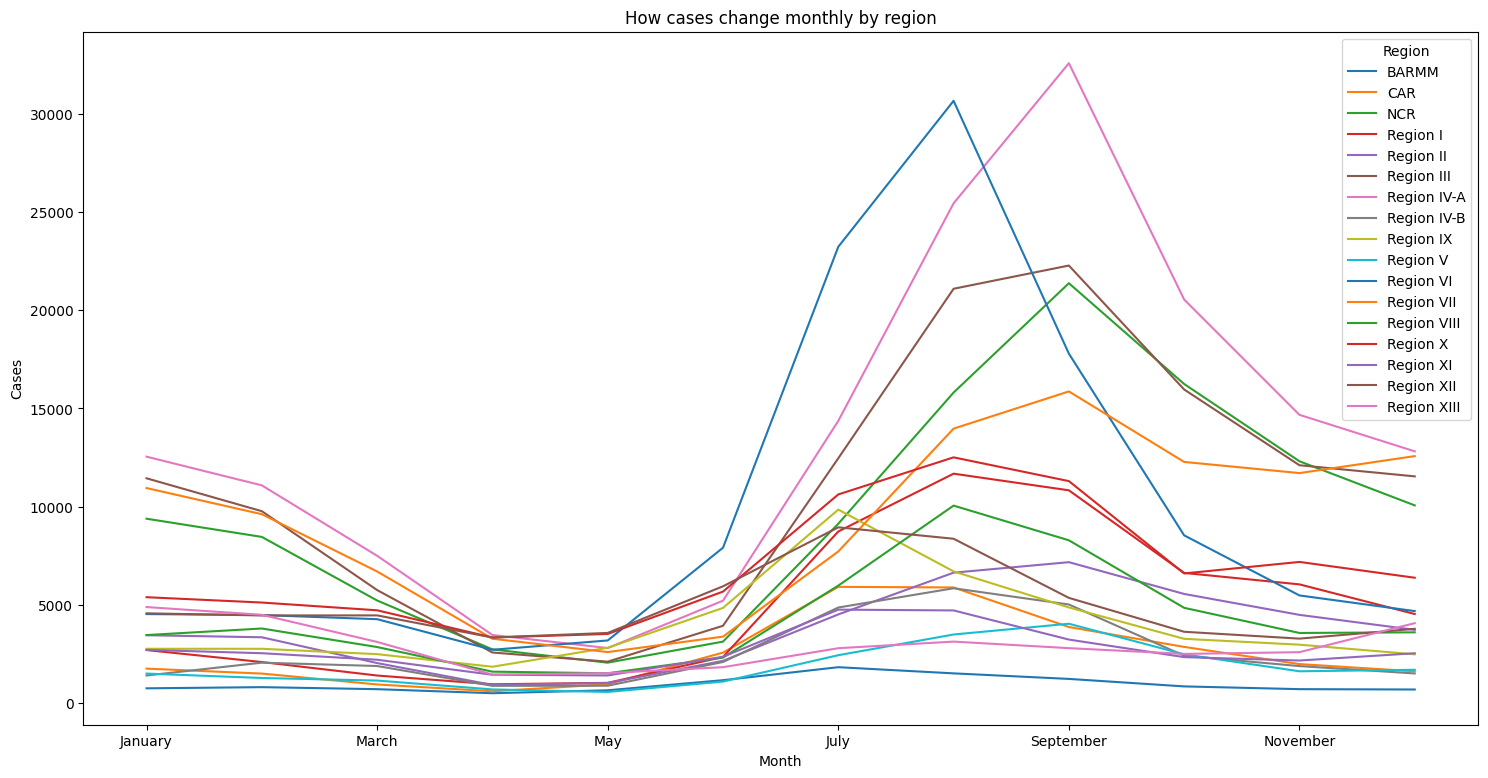

In [30]:
dengue.groupby(['Region', 'Month'])['Dengue_Cases'].sum().unstack().T.plot(figsize=(12,6))
plt.title("How cases change monthly by region")
plt.gcf().set_size_inches(18, 9)
plt.ylabel("Cases")
plt.show()

<h1>INSIGHT: Cases changes the same every month by all Regions however in some Month other Regions recorded more Dengue Cases like Region VI and Region IV-A though we can still conclude that the Month has the correlation by Dengue Cases also the Dengue Cases actually rises during Ber Months </h1>

<h1>10. Recorded Deaths per Region during 2019</h1>

C:\Users\LAB4-StudentPC33\AppData\Local\Temp\ipykernel_17428\1218210667.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dengue[dengue['Year'] == 2019].groupby('Region')['Dengue_Deaths'].sum().plot(kind='line', color = 'green')


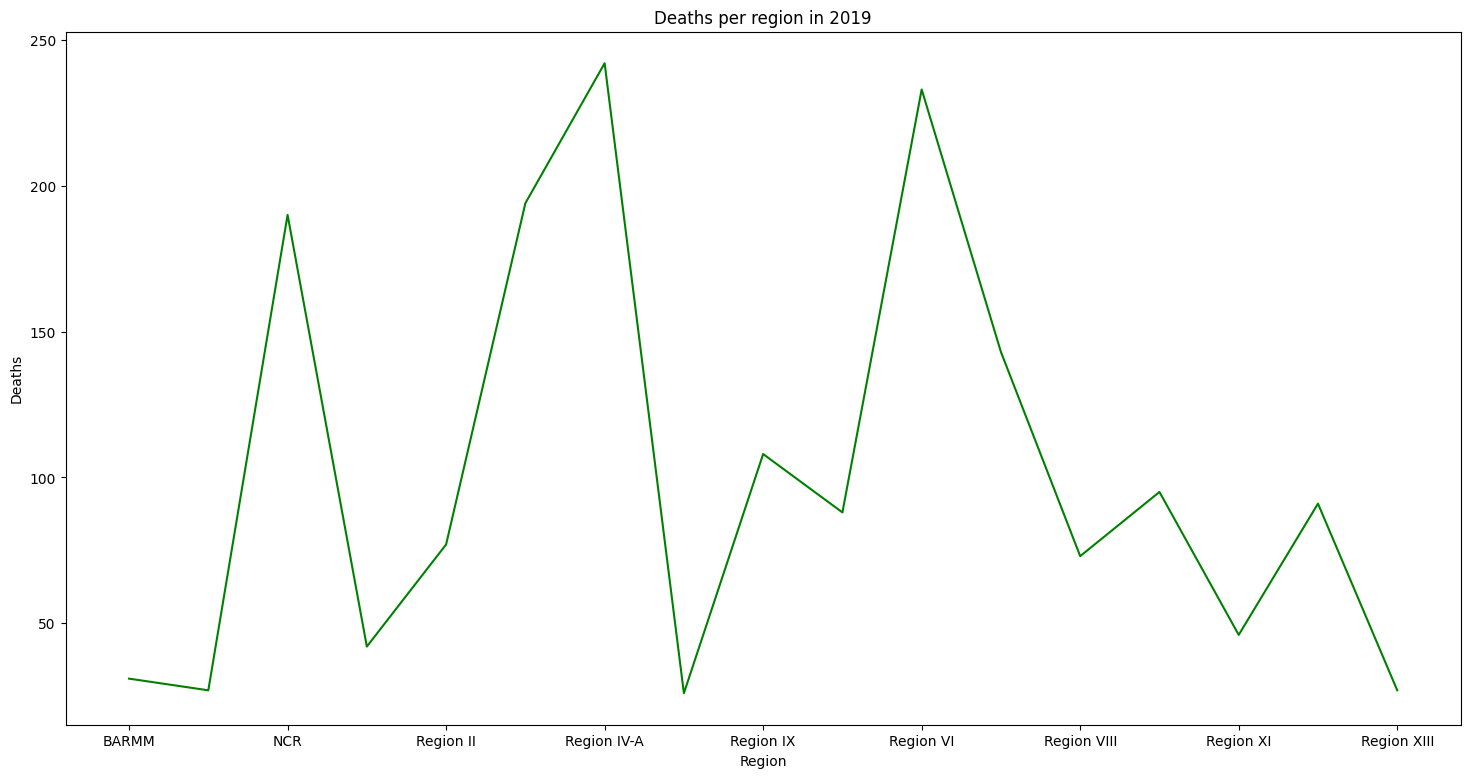

In [38]:
dengue[dengue['Year'] == 2019].groupby('Region')['Dengue_Deaths'].sum().plot(kind='line', color = 'green')
plt.title("Deaths per region in 2019")
plt.gcf().set_size_inches(18, 9)
plt.ylabel("Deaths")
plt.show()

<h1>INSIGHT: in 2019, Region IV-A recorded the Most Dengue Deaths</h1>

<h1>11. How Dengue Cases Distributed</h1>

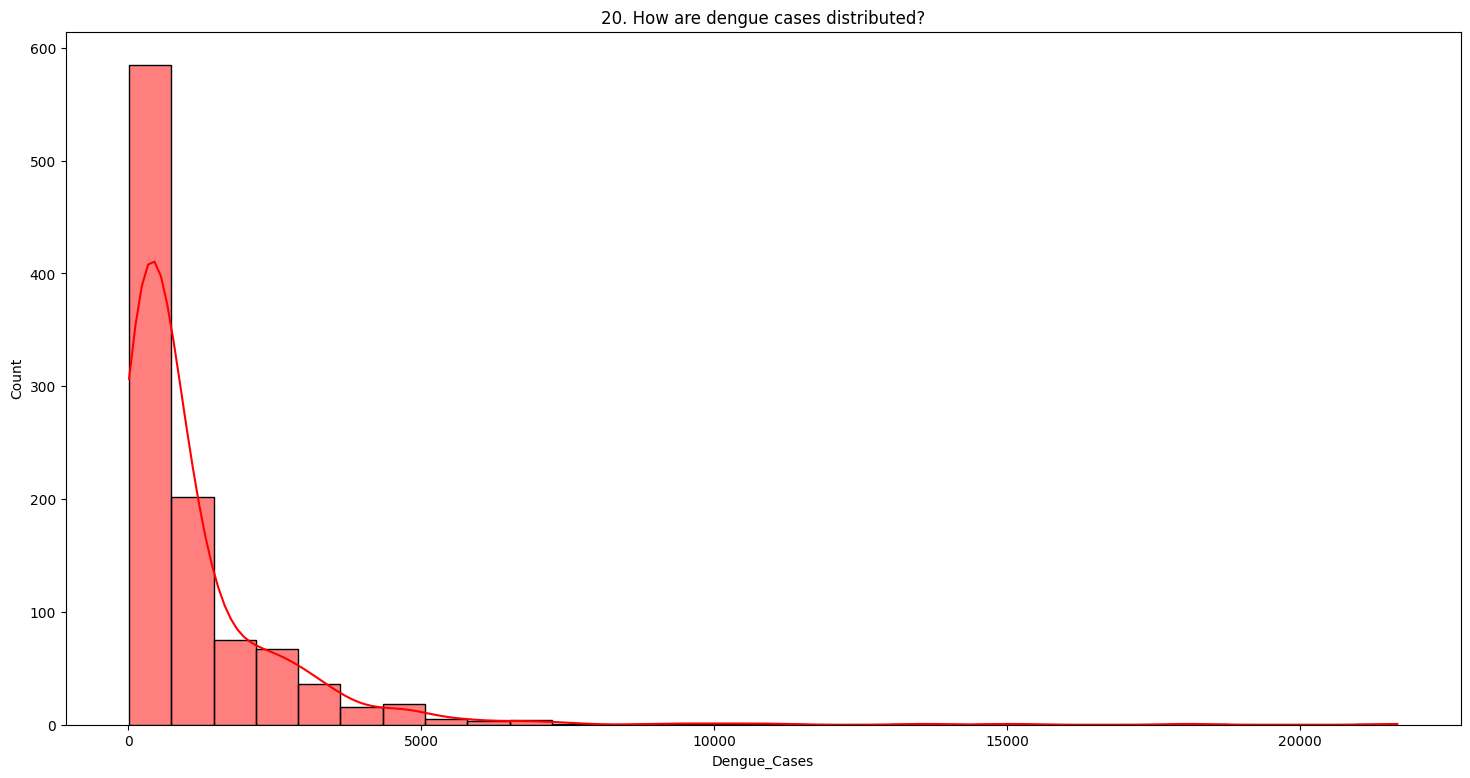

In [37]:
sns.histplot(dengue['Dengue_Cases'], kde=True, bins=30, color = 'red')
plt.title("How are dengue cases distributed?")
plt.gcf().set_size_inches(18, 9)
plt.show()

<h1>INSIGHT: Most months have few cases; a few have very high counts</h1>

In [21]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Date
0,January,2016,Region I,705,1,2016-01-01
840,January,2016,NCR,1261,4,2016-01-01
780,January,2016,Region XIII,1116,6,2016-01-01
240,January,2016,Region IV-B,203,1,2016-01-01
120,January,2016,Region III,1976,3,2016-01-01
...,...,...,...,...,...,...
119,December,2020,Region II,96,0,2020-12-01
899,December,2020,NCR,658,4,2020-12-01
59,December,2020,Region I,1081,1,2020-12-01
659,December,2020,Region X,281,1,2020-12-01
